# 1. Importattion de packages

In [1]:
# Importation de packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Chargement de donnees

In [2]:
# Chargement de donnees
data = pd.read_csv("USA_Housing.csv")

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# 3. Exploratory Data Analysis

In [4]:
data.shape

(5000, 7)

In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [9]:
data.drop(['Address'], axis=1, inplace=True)

<Axes: >

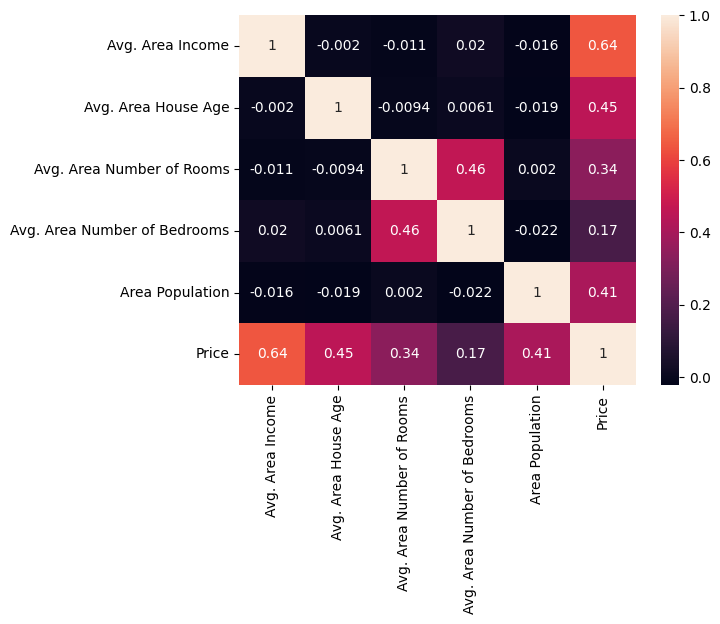

In [10]:
sns.heatmap(data.corr(), annot=True)

In [11]:
data.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

In [12]:
data.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06


In [13]:
data[data['Avg. Area House Age'] > 8]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
10,80527.472083,8.093513,5.042747,4.10,47224.359840,1.707046e+06
25,56974.476539,8.287562,7.312880,4.33,40694.869513,1.453975e+06
56,73265.449888,8.314762,7.425597,3.24,21030.966177,1.547133e+06
80,58544.460298,8.562611,7.276309,4.28,30865.586954,1.421217e+06
102,74218.489022,8.069722,6.506374,4.37,46770.660968,1.783535e+06
...,...,...,...,...,...,...
4859,73685.403658,8.916093,6.291818,3.05,36000.506028,1.798927e+06
4874,67794.294771,8.104891,6.211783,2.45,25903.809477,1.343395e+06
4965,76395.646941,8.109899,5.548906,3.16,36758.321337,1.604955e+06
4975,54037.580879,8.471765,6.966072,3.27,28696.170856,1.324382e+06


In [14]:
data['Avg. Area House Age'].unique()

array([5.68286132, 6.00289981, 5.86588984, ..., 7.25059061, 5.53438842,
       5.99230531])

In [15]:
data['Avg. Area House Age'].min()

np.float64(2.644304186036705)

In [16]:
data['Avg. Area House Age'].max()

np.float64(9.51908806613594)

In [17]:
data = data.iloc[ 0:500 , :]

In [18]:
data = data[['Avg. Area Income', 'Price']]

In [19]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


# 4. Division de donnees en X et  y

In [20]:
# Division de donnees en X: Variable independante et y: Variable dependante
X = data.iloc[ : , :-1].values
y = data.iloc[ :, -1].values

In [39]:
#X

In [40]:
#y

In [23]:
# 5. Separation des donnes en donnees d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)

In [24]:
print("Donnees d'entrainement -> X train:", X_train.shape)
print("Donnees d'entrainement -> y train:", y_train.shape)

Donnees d'entrainement -> X train: (350, 1)
Donnees d'entrainement -> y train: (350,)


In [25]:
print("Donnees de test -> X test:", X_test.shape)
print("Donnees de test -> y test:", y_test.shape)

Donnees de test -> X test: (150, 1)
Donnees de test -> y test: (150,)


# 5. Creation des modele de Machine Learning

## 5.1. Linear Regression : Regression Lineaire

In [26]:
# Creation de l'objet du modele
modele_lineaire_Simple = LinearRegression() 

In [27]:
# Entrainement du modele
modele_lineaire_Simple.fit(X_train, y_train)

LinearRegression()

In [41]:
modele_lineaire_Simple.score(X_train, y_train)

0.2949134850105184

In [28]:
# Faire la prediction
y_predits_Lr = modele_lineaire_Simple.predict(X_test)

In [29]:
y_test

array([ 996771.24815077, 1103072.43866161, 1131154.51836542,
       1051123.83309999, 1696977.6628326 , 1453327.91633352,
       1367586.27773802, 1534889.85346666, 1382110.2781823 ,
       1648246.7742056 ,  743999.8191602 , 1291759.39266068,
        966084.42043035,  874103.66060659, 1696717.10729937,
        837668.10260211, 1659805.18404135,  954746.57643282,
       1252419.19639916, 1397341.85599371,  901881.74268624,
        568977.07276908,  882057.17059284, 1028964.47393477,
       1637259.99866779, 1520234.22937746, 1487849.87617124,
       1498640.55065037,  819598.00784818, 1010813.70905556,
       1552536.76397455, 1177289.88620479, 1571464.96522196,
       1370274.38731202,  798869.53283316, 1525533.40662551,
       1353488.41646297, 1051644.55402255,  936368.96340486,
        796389.43795663, 1714445.17463658, 1800685.92248892,
       1523136.48472095, 1169944.24775875, 1505890.91484695,
       1300265.21041547,  152071.87474956,  663732.39689633,
       1490539.05810979,

In [30]:
y_predits_Lr

array([ 947469.07734723, 1102182.13380643, 1452774.67128647,
       1036960.42160637, 1320418.31112854, 1321829.77902986,
       1136797.19307211, 1174246.00128338, 1127478.51742586,
       1333218.0579471 , 1093143.53494726, 1311687.2382118 ,
       1532214.23998005, 1056213.48494502, 1115641.4842463 ,
       1071303.70740045, 1592895.13750359, 1185969.0997048 ,
        920193.37485208, 1133384.68743822, 1192249.56528275,
       1054038.6158193 ,  837698.53313095, 1254895.72270873,
       1366601.34649749, 1336044.98836231, 1363784.43419496,
       1351171.1917948 ,  980831.10079154, 1299169.2875332 ,
       1471550.79472002, 1172191.84284403, 1167065.32157648,
       1332903.66041764, 1079630.84658869, 1324469.56626901,
       1097559.38345902, 1219785.43520569, 1009084.90615517,
        996679.54304282, 1209235.82263346, 1368767.27938253,
       1455349.31797449, 1243895.27087215, 1418829.94935833,
       1212180.86280723,  736217.20051974,  915763.77609898,
       1416442.31528717,

In [31]:
# Evaluation du modele
print("MSE de la Regression Lineaire:", mean_squared_error(y_test, y_predits_Lr))
print("R2 Score de la Regression Lineaire:", r2_score(y_test, y_predits_Lr))

MSE de la Regression Lineaire: 76965763753.73895
R2 Score de la Regression Lineaire: 0.46970222336740064


In [32]:
data.shape

(500, 2)

### 5.1.1  Visualisation de la prediction

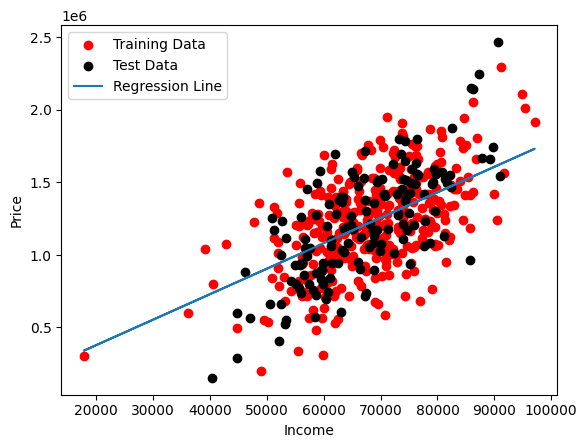

In [33]:
plt.scatter(X_train, y_train, color='red', label='Training Data') # Donnees d'entrainement
plt.scatter(X_test, y_test, color='black', label='Test Data') # Donnees d'entrainement
plt.plot(X_train, modele_lineaire_Simple.predict(X_train), label='Regression Line') # Prediction sur les donnes d'entrainement
plt.xlabel("Income")
plt.ylabel("Price")
plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
modele_Random_Forest = RandomForestRegressor()
modele_Random_Forest.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
y_predicted_rf = modele_Random_Forest.predict(X_test)

In [37]:
print("Mean Squared Error De Random Forest:", mean_squared_error(y_test, y_predicted_rf))
print("R2 Squared de Random Forest:", r2_score(y_test, y_predicted_rf))

Mean Squared Error De Random Forest: 103973576205.04878
R2 Squared de Random Forest: 0.2836171097256345


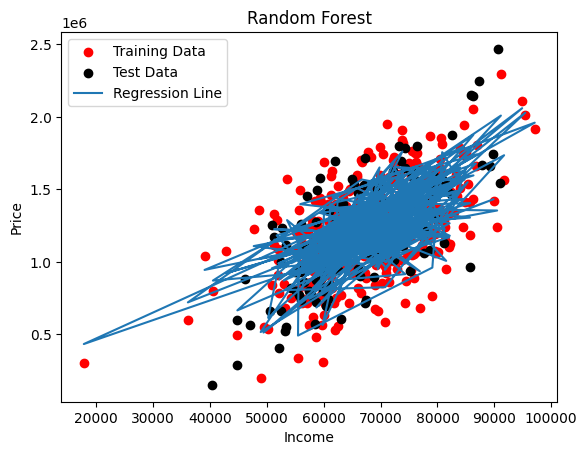

In [38]:
plt.scatter(X_train, y_train, color='red', label='Training Data') # Donnees d'entrainement
plt.scatter(X_test, y_test, color='black', label='Test Data') # Donnees d'entrainement
plt.plot(X_train, modele_Random_Forest.predict(X_train), label='Regression Line') # Prediction sur les donnes d'entrainement
plt.xlabel("Income")
plt.ylabel("Price")
plt.title("Random Forest")
plt.legend()
plt.show()

In [42]:
pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.
